# K Vecino más cercano (K Nearest Neighbors o KNN)

In [1]:
from matplotlib.colors import ListedColormap

from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from src.knn_ploting import plot_distances

%matplotlib inline
# Make it pretty
plt.style.use('ggplot')

## Chequeo general

In [2]:
cars = pd.read_csv('data/cars_multivariate.csv', na_values=['?'])
cars = cars[cars.horsepower.notnull()]

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


En este caso, trataremos de predecir la columna `mpg`, la cual será nuestro target o **y** 
```
y => Variable objetivo   
X => Características   
```
  
La `X` representa múltiples observaciones, mientras que una `x` representa una sola observación.

### Sklearn y POO
     
Sklearn sigue una POO agradable que hace que su uso sea muy fácil una vez que aprendemos lo básico.

In [4]:
class ModelClass:

    def __init__(self, *arg, **kwargs):
        '''
        Establecer hiperparametros
        '''
        pass
    
    
    def fit(self, X, y): 
        '''
        X = X de entrenamiento
        y = Etiquetas de entrenamiento
        
        Almacena los datos de entrenamiento para futuras predicciones
        '''
        pass
    
    
    def predict(self, x):  
        '''
        x = nueva información
        
        Devuelve el valor predecido de x
        '''
        
        pass
    
    
    def predict_proba(self, x):  
        '''
        x = nueva información
        
        Si se trata de un modelo de clasificación regresa la
        probabilidad de que x pertenezca a cada clase
        '''
        
        pass

## Hagamos un modelo de mean_regressor para practicar

¿Qué es un regresor medio?

Mean_Regressor significa que la regresión se hará para obtener la media

In [5]:
class Mean_Regressor():
    
    def __init__(self, *arg, **kwargs):    #no hyperparameters
        pass
    
    def fit(self, X, y): 
        pass 
    
    def predict(self, x):  
        pass

In [6]:
class Mean_Regressor():
    
    def __init__(self, *arg, **kwargs):    #no hyperparameters
        pass
    
    def fit(self, X, y): 
        self.mean_prediction = y.mean()
        return self
    
    def predict(self, x):  
        return self.mean_prediction

We will use the Boston housing dataset.  We will use the 3 columns 'Crime_Rate', 'Avg_Rooms', 'Pct_built_b4_1940'.

In [32]:
#importing sample dataset
from sklearn.datasets import load_boston

boston = load_boston(return_X_y=False)

X = pd.DataFrame(boston.data[:, (0, 5, 6)], columns = ['Crime_Rate', 'Avg_Rooms', 'Pct_built_b4_1940'])
y = boston.target

C:\Users\isaac.cedeno\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [33]:
X.head()

,Crime_Rate,Avg_Rooms,Pct_built_b4_1940
0,0.00632,6.575,65.2
1,0.02731,6.421,78.9
2,0.02729,7.185,61.1
3,0.03237,6.998,45.8
4,0.06905,7.147,54.2


In [34]:
#X = features
X.shape

(506, 3)

In [35]:
model = Mean_Regressor()

In [39]:
model.fit(X, y);

La media de y se calcula como:

In [41]:
y.mean()

22.532806324110677

Al calcular la respectiva y de un conjunto nuevo X:

In [42]:
#Características de una nueva ciudad:
'''
Crime_Rate            0.09
Avg_Rooms             6.41
Pct_built_b4_1940    84.10
'''

new_town = np.array([.09, 6.41, 84.10])

In [43]:
model.predict(new_town)

22.532806324110677

El modelo predice la y como la media de los valores de entrenamiento.

# KNN

El modelo kNN es un modelo de aprendizaje supervisado no paramétrico que se utiliza para la clasificación o la regresión.

## KNN para regresión

In [ ]:
# import scipy as sp

# np.random.seed(7)  

# horse_weight = (np.random.rand(100) * 1500.0 + 400.0  + 50)*0.454      # lbs
# horse_height = (horse_weight/370 + np.random.normal(0, 0.5, horse_weight.shape) + 2.5)*30.48  # ft

# dog_weight = (np.random.rand(40) * 500.0 + 10.0)*0.454      # lbs
# dog_height = (dog_weight/300 + np.random.normal(0, 0.3, dog_weight.shape) + 0.5)*30.48  # ft

# plt.plot(horse_weight, horse_height, 'ro', label='Equino')
# plt.plot(dog_weight, dog_height, 'bo', label='Canino')
# plt.scatter(200,2, marker='X', c='black', s=140)
# plt.title("Equino vs Canino")
# plt.xlabel("Peso (kg)")
# plt.ylabel("Altura (cm)")
# plt.legend()
# plt.show()

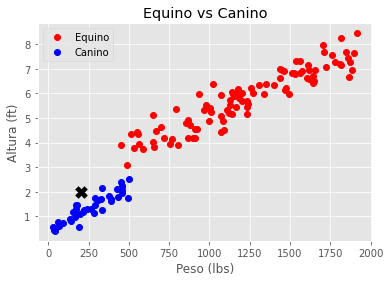

In [47]:
import scipy as sp

np.random.seed(7)  

horse_weight = np.random.rand(100) * 1500.0 + 400.0  + 50      # lbs
horse_height = horse_weight/370 + np.random.normal(0, 0.5, horse_weight.shape) + 2.5  # ft

dog_weight = np.random.rand(40) * 500.0 + 10.0      # lbs
dog_height = dog_weight/300 + np.random.normal(0, 0.3, dog_weight.shape) + 0.5  # ft

plt.plot(horse_weight, horse_height, 'ro', label='Equino')
plt.plot(dog_weight, dog_height, 'bo', label='Canino')
plt.scatter(200,2, marker='X', c='black', s=140)
plt.title("Equino vs Canino")
plt.xlabel("Peso (lbs)")
plt.ylabel("Altura (ft)")
plt.legend()
plt.show()

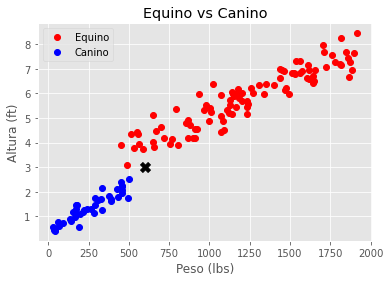

In [48]:
plt.plot(horse_weight, horse_height, 'ro', label='Equino')
plt.plot(dog_weight, dog_height, 'bo', label='Canino')
plt.scatter(600, 3, marker='X', c='black', s=110)
plt.title("Equino vs Canino")
plt.xlabel("Peso (lbs)")
plt.ylabel("Altura (ft)")
plt.legend()
plt.show()

## MPG

In [50]:
cars = pd.read_csv('data/cars_multivariate.csv', na_values=['?'])
cars = cars[cars.horsepower.notnull()]

In [59]:
np.sqrt(392)

19.79898987322333

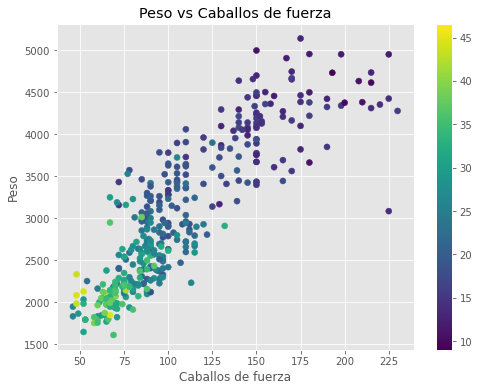

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))
im =ax.scatter(cars.horsepower, cars.weight, c=cars.mpg)
ax.set_xlabel('Caballos de fuerza')
ax.set_ylabel('Peso')
ax.set_title('Peso vs Caballos de fuerza')
fig.colorbar(im, ax=ax)

Para crear una sección en el gráfico entre 75 y 100 HP

In [52]:
section = cars[(cars.horsepower > 75) & (cars.horsepower < 100)]

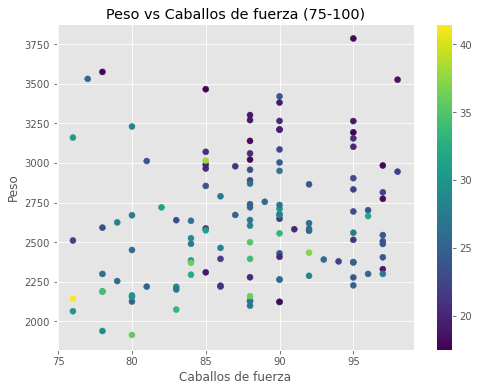

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))
im =ax.scatter(section.horsepower, section.weight, c=section.mpg)
ax.set_xlabel('Caballos de fuerza')
ax.set_ylabel('Peso')
ax.set_title('Peso vs Caballos de fuerza (75-100)')
fig.colorbar(im, ax=ax)

Si tenemos un vehículo con 82 HP y un peso de 2250 lbs con un consumo de mpg desconocido, y deseamos estimar su consumo, el primer paso es ubicar el auto dentro del gráfico.

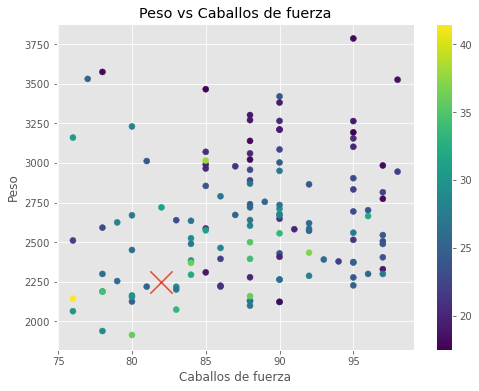

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
im =ax.scatter(section.horsepower, section.weight, c=section.mpg)
ax.scatter([82],[2250],s=[500], marker='x')
ax.set_xlabel('Caballos de fuerza')
ax.set_ylabel('Peso')
ax.set_title('Peso vs Caballos de fuerza')
fig.colorbar(im, ax=ax)

Crearemos una subsección de 79-86 HP y 2000-2250 lbs para analizar sus vecinos más cercanos.

In [56]:
sub = section[(section.horsepower > 79) & (section.horsepower < 86 ) & (section.weight < 2550) & (section.weight > 2000)]

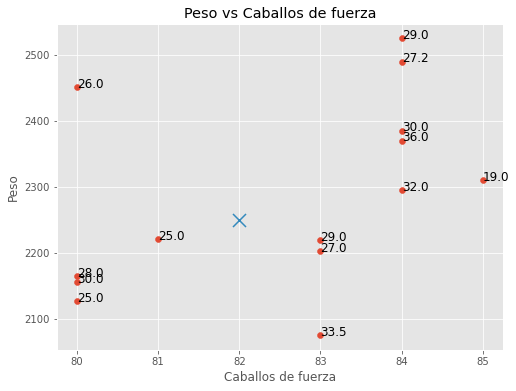

In [57]:
x = sub.horsepower.values
y = sub.weight.values

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(sub.horsepower, sub.weight)
ax.scatter([82],[2250],s=[170], marker='x')
ax.set_xlabel('Caballos de fuerza')
ax.set_ylabel('Peso')
ax.set_title('Peso vs Caballos de fuerza')


for i, txt in enumerate(sub.mpg):
    ax.annotate(str(txt), (x[i], y[i]), fontsize=12)


### Realizar una predicción




<img src="images/regression_knn.png" width=500 align="left"/>

Los k vecinos más cercanos tienen distancias $$d_1, d_2,..., d_k$$ al punto X

Los k vecinos más cercanos tienen targets $$t_1, t_2,..., t_k$$

Predict the mean value of the targets.

# Regresión con KNN
   
      
         
### El modelo de dos pasos:

1.- Algoritmo de entrenamiento:   

 - Almacenar todos los datos.   
 
2.- Algoritmo de predicción (predecir el valor de un nuevo punto $x$):   

 - Calcular la distancia de $x$ a todos los puntos del conjunto de datos.
 - Ordenar los puntos del conjunto de datos por distancia creciente desde $x$.
 - Obtener la media del objetivo de los $k$ puntos más cercanos.           

## Métricas de distancia

Existen diferentes métricas de distancia entre vecinos, como:

### Distancia Manhattan
Distancia de Taxi, L1

La distancia *Manhattan* es la distancia medida a lo largo de los ejes en ángulo recto:

$$\sum_i |a_i - b_i|$$


### Distancia Euclideana

Línea recta, L2

La distancia *Euclideana* se mide por una línea del punto *a* al punto *b*:

$$ d(\mathbf{a}, \mathbf{b}) = ||\mathbf{a} - \mathbf{b}|| \ = \sqrt{\sum (a_i - b_i)^2} $$



#### por defecto en sklearn se utiliza la distancia [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance) (con p=2 es equivalente a la distancia Euclideana,  y con p=1 es Manhattan)

## Votaciones

Los `k` vecinos más cercanos tienen distancias: `d1`,`d2`,....,`dn`
el $enésimo$ punto vota como: 
$\frac{1}{d_{n}}$

### Predecir MPG a partir de los Cabalos de fuerza

Text(0.5, 1.0, 'Caballos de fuerza vs MPG')

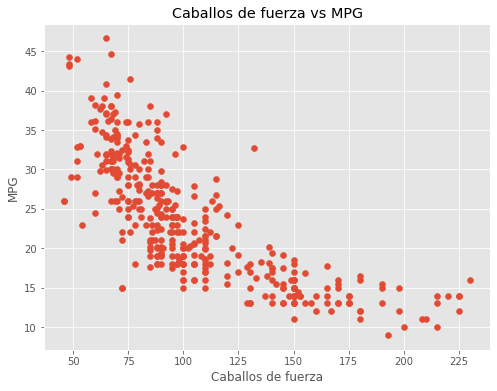

In [76]:
X = cars.horsepower.values
y = cars.mpg.values

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X,y)
ax.set_xlabel('Caballos de fuerza')
ax.set_ylabel('MPG')
ax.set_title('Caballos de fuerza vs MPG')

## Elegir K

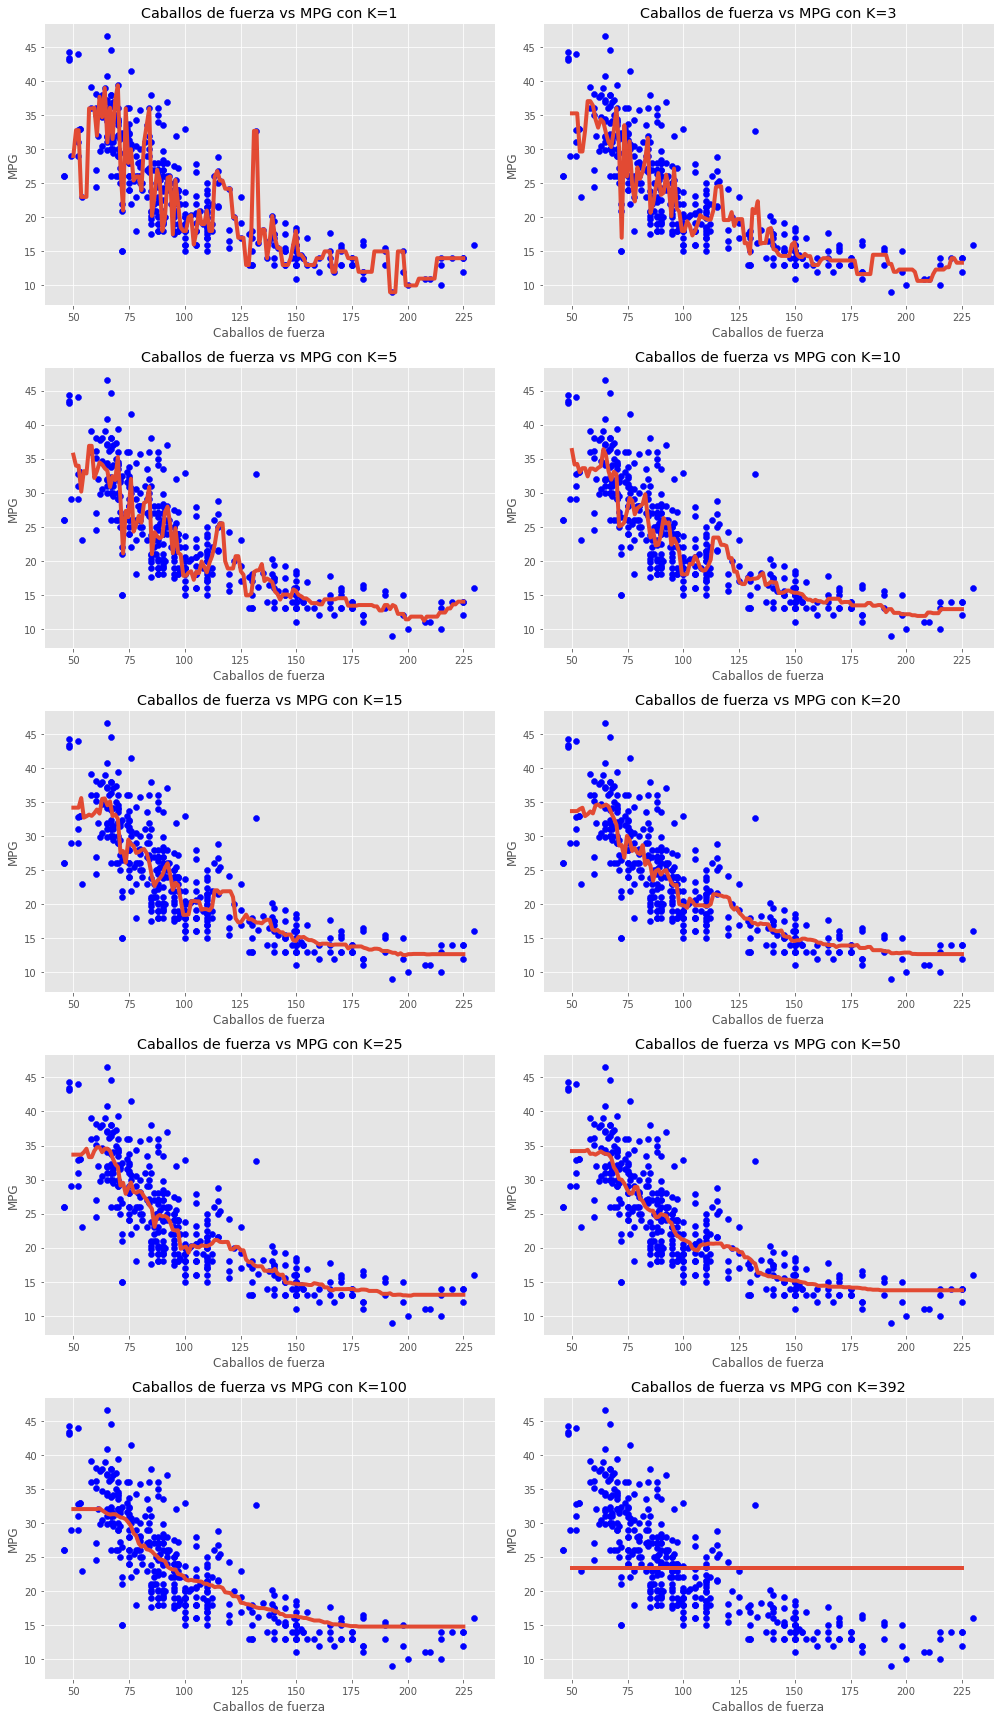

In [77]:
fig, axs = plt.subplots(5, 2, figsize=(14, 24))
x_tick = np.linspace(50, 225, 150)
k_num = [1, 3, 5, 10, 15, 20, 25, 50, 100, 392]

for k, ax in zip(k_num,axs.flatten()):
    model = KNeighborsRegressor(k)
    model.fit(X.reshape(-1,1),y.reshape(-1,1))
    ax.scatter(X,y,c='blue')
    ax.plot(x_tick, model.predict(x_tick.reshape(-1,1)), linewidth=4)
    ax.set_xlabel('Caballos de fuerza')
    ax.set_ylabel('MPG')
    ax.set_title('Caballos de fuerza vs MPG con K={}'.format(k))

fig.tight_layout()

Una $k$ demasiado pequeña dimensiona el modelo demasiado cerca de cada punto, lo que puede ocasionar un **sobre dimensionamiento** como en el caso k=1.

Mientars $k$ incrementa, se incluyen más vecinos para calcular el resultado, suavizando el modelo. Se debe tener cuidado de no caer en un ***bajo dimensionamiento** como en el caso k=392.

# Como encontrar el mejor K?

Un buen punto inicial es $\sqrt{n}$

In [69]:
np.sqrt(392)

19.79898987322333

In [119]:
model = KNeighborsRegressor(19)
model.fit(X.reshape(-1,1),y.reshape(-1,1))

KNeighborsRegressor(n_neighbors=19)

In [120]:
new_value=[[150]] #HP

In [121]:
model.predict(new_value)

array([[14.68421053]])

## Disminuyendo K manualmente hasta 5

In [122]:
model2 = KNeighborsRegressor(5)
model2.fit(X.reshape(-1,1),y.reshape(-1,1))

KNeighborsRegressor()

In [123]:
model2.predict(new_value)

array([[15.6]])

# ¿Que tan acertado es el resultado?

Para medir el error comúnmente se utiliza el MSE o Error cuadrado medio. El error para un punto en específico es la diferencia entre el valor observado y el calculado.
$$
MSE := \frac{1}{n} \sum_{i=1}^n (\hat{y_i} - y_i)^2
$$

## R-Cuadrada

Debido a que el MSE es dependiente del conjunto de datos, existe otra manera de medir el ajuste de un modelo, conocido como $R^2$. 

\begin{align}
    R^2 &:= 1 - \frac{SS_{res}}{SS_{tot}} \\
    &= 1 - \frac{\sum_{i=1}^n (\hat{y_i} - y_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{align}    

$SS_{res}$ es la suma del cuadrado de los residuales y $SS_{tot}$ es la suma total de los cuadrados. $R^2$ se conoce como la fracción de la varianza en los datos que puede ser explicada por el modelo.

$R^2$ va de 0 hasta 1. 0 significa que el modelo no explica la varianza, mientras que 1 significa que el modelo explica toda la varianza.

## Probar K vs MSE

In [125]:
def predict_sample(X, y, k, seed):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=seed)
    
    clf = make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform'))
    clf.fit(X_train, y_train)
    
    return mean_squared_error(clf.predict(X_test), y_test)

In [126]:
X = cars[['weight','horsepower']].values
y = cars['mpg'].values

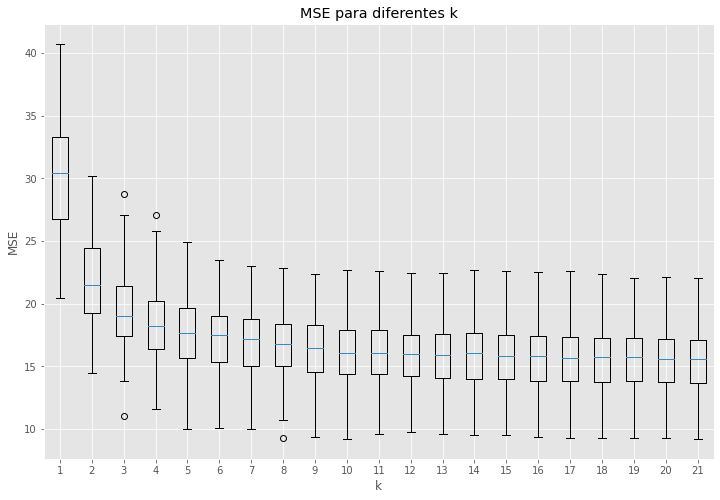

In [127]:
max_k = 22
step = 1
results = []
for k in range(1, max_k, step):
    kresults = []
    for seed in range(100):
        kresults.append(predict_sample(X, y, k, seed))
    results.append(kresults)
results = pd.DataFrame(results)
fig, ax = plt.subplots(figsize=(12, 8))

data = np.array(results.T)
ax.boxplot(data, labels=range(1, max_k, step))
ax.set_xlabel("k")
ax.set_ylabel("MSE")
ax.set_title("MSE para diferentes k")
plt.show()

## Escala de los datos

Cuando se trata de modelos que miden la distancia es importante escalar los datos para que estén en el mismo formato.  Todos los gráficos que hemos visto hasta ahora han sido escalados automáticamente por matplotlib, pero veamos un ejemplo para resaltar su importancia.

A continuación vemos la puntuación de un examen teniendo en cuenta la cantidad de clases a las que ha asistido el alumno y las horas que ha estudiado.

Trataremos de encontrar la puntuación de alguien que ha asistido al 80% de las clases y estudió por 8 horas y media.

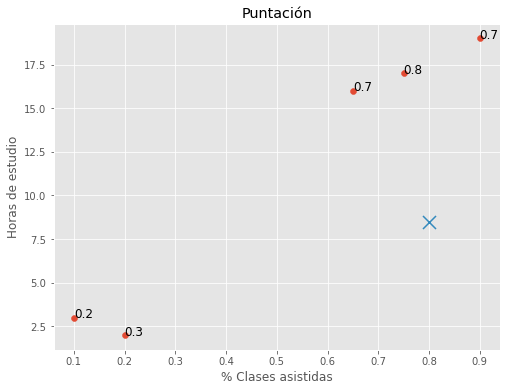

In [129]:
x = [.1, .2, .65, .75, .9]
y = [3, 2, 16, 17, 19]
c = [.2, .3, .7, .8, .7] 
x_1 = .8
y_1 = 8.5
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)
ax.scatter([x_1],[y_1],s=[170], marker='x')
ax.set_xlabel('% Clases asistidas')
ax.set_ylabel('Horas de estudio')
ax.set_title('Puntación')


for i, txt in enumerate(c):
    ax.annotate(str(txt), (x[i], y[i]), fontsize=12)
    

Calcularemos la distancia de todos los puntos hacia (x_1,y_1)

Text(0.5, 1.0, 'Puntación')

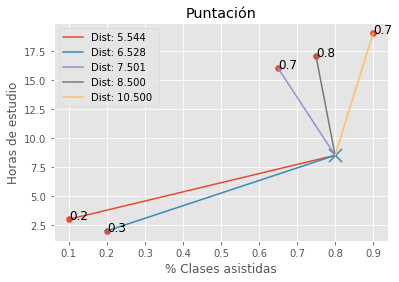

In [131]:
fig, ax = plt.subplots()
plot_distances(ax, x, y, c, x_1, y_1)
ax.set_xlabel('% Clases asistidas')
ax.set_ylabel('Horas de estudio')
ax.set_title('Puntación')

En el gráfico, el eje y va de 0 a 20, mientras que el eje x va de 0 a 10

## Cambio de escala

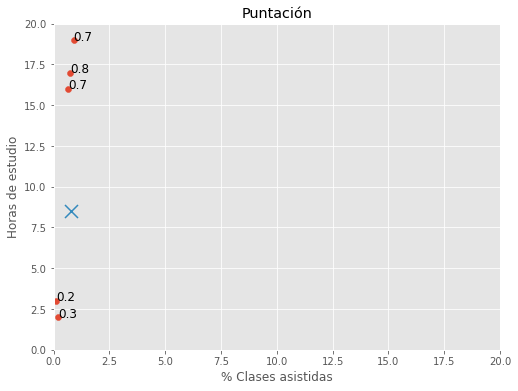

In [132]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)
ax.set_xlim([0,20])
ax.set_ylim([0,20])
ax.scatter([x_1],[y_1],s=[170], marker='x')
ax.set_xlabel('% Clases asistidas')
ax.set_ylabel('Horas de estudio')
ax.set_title('Puntación')


for i, txt in enumerate(c):
    ax.annotate(str(txt), (x[i], y[i]), fontsize=12)

Existen diferentes funciones en SKLearn para escalar los datos como: 
     
[Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) que se calcula mediante:
$$
z_i = \frac{x_i-\mu}{s}
$$
[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). calculado con:
$$
z_i = \frac{x_i - min(x)} {max(x) - min(x)}
$$